# Pattern Matching Experiments

In [1]:
from DSGRN import *

# Networks

We give two sets of networks. One of them allows for all parameters. The other is identical except it only uses essential parameters.

In [2]:
network_4_3_1 = Network()
network_4_3_1.assign('\n'.join(["NDD1 : (SWI4)(~YOX1)", "HCM1 : NDD1", "SWI4 : HCM1", "YOX1 : NDD1"]))

In [3]:
network_4_3_2 = Network()
network_4_3_2.assign('\n'.join(["SWI4 : (NDD1)(~YOX1)", "HCM1 : SWI4", "NDD1 : HCM1", "YOX1 : SWI4"]))

# Path match analysis

We give two functions for path match analysis. One looks at the entire domain graph. The other only checks for path matches in stable Morse sets.

## Analysis on entire domain graph

In [4]:
def Analyze(network, events, event_ordering):
    poe = PosetOfExtrema(network, events, event_ordering )
    pattern_graph = PatternGraph(poe)
    parameter_graph = ParameterGraph(network)
    result = []
    for parameter_index in range(0, parameter_graph.size()):
        parameter = parameter_graph.parameter(parameter_index)
        search_graph = SearchGraph(DomainGraph(parameter))
        matching_graph = MatchingGraph(search_graph, pattern_graph)
        if PathMatch(matching_graph):
            result.append(parameter_index)
    return [result,  parameter_graph.size()]

# Poset of Extrema

We study two poset of extrema. The first poset comes from looking at times [10,60] and assuming SWI4 happens before the other minima at the beginning and thus can be excluded. The other comes from including all extrema.

In [5]:
events = [("SWI4", "min"), ("HCM1", "min"), ("NDD1", "min"), ("YOX1", "min"), 
          ("SWI4", "max"), ("HCM1", "max"), ("YOX1", "max"), 
          ("NDD1", "max"),
          ("SWI4","min"),
          ("YOX1", "min"), ("HCM1","min"), ("NDD1", "min"),
          ("SWI4", "max"), ("HCM1", "max"), ("YOX1", "max"), ("NDD1", "max")]
event_ordering = [ (i,j) for i in [0,1,2,3] for j in [4,5,6] ] + \
                 [ (i,j) for i in [4,5,6] for j in [7] ] + \
                 [ (i,j) for i in [7] for j in [8] ] + \
                 [ (i,j) for i in [8] for j in [9,10,11] ] + \
                 [ (i,j) for i in [9,10,11] for j in [12,13,14,15] ]

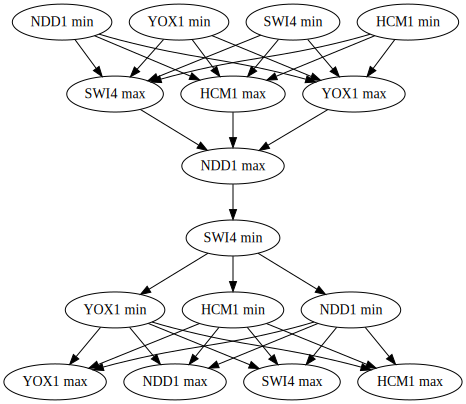

In [6]:
DrawGraph(PosetOfExtrema(network_4_3_1, events, event_ordering ))

# Pattern Graph Visualization

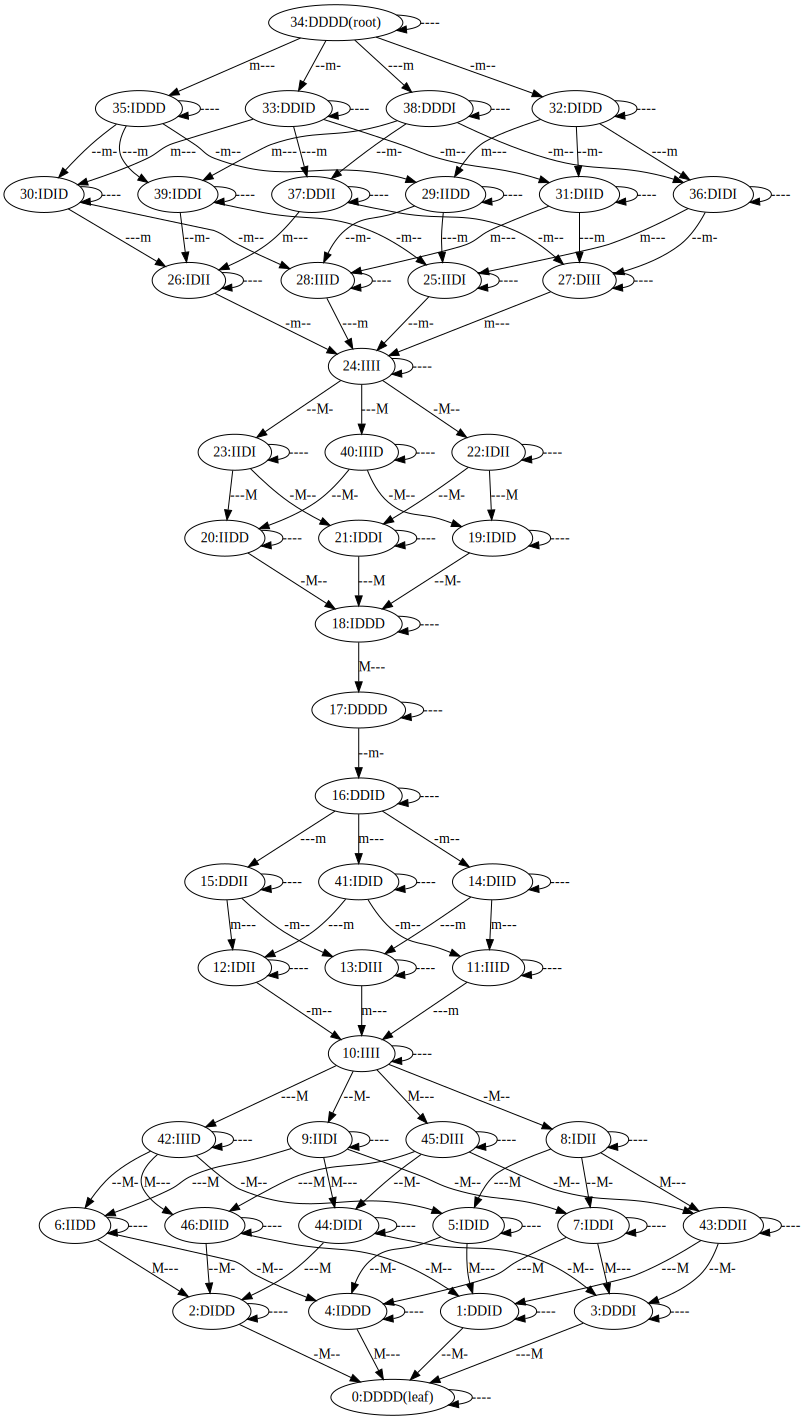

In [7]:
poe = PosetOfExtrema(network_4_3_1, events, event_ordering )
pattern_graph = PatternGraph(poe);
DrawGraph(pattern_graph)

# Experiments



In [8]:
%%time
len(Analyze(network_4_3_1, events, event_ordering)[0])

CPU times: user 105 ms, sys: 1.27 ms, total: 106 ms
Wall time: 105 ms


0

In [9]:
%%time
len(Analyze(network_4_3_2, events, event_ordering)[0])

CPU times: user 101 ms, sys: 1.16 ms, total: 102 ms
Wall time: 102 ms


22

In [10]:
poe = PosetOfExtrema(network_4_3_2, events, event_ordering )
pattern_graph = PatternGraph(poe)
parameter_graph = ParameterGraph(network_4_3_2)

In [11]:
parameter_index = Analyze(network_4_3_2, events, event_ordering)[0][0]
parameter = parameter_graph.parameter(parameter_index)

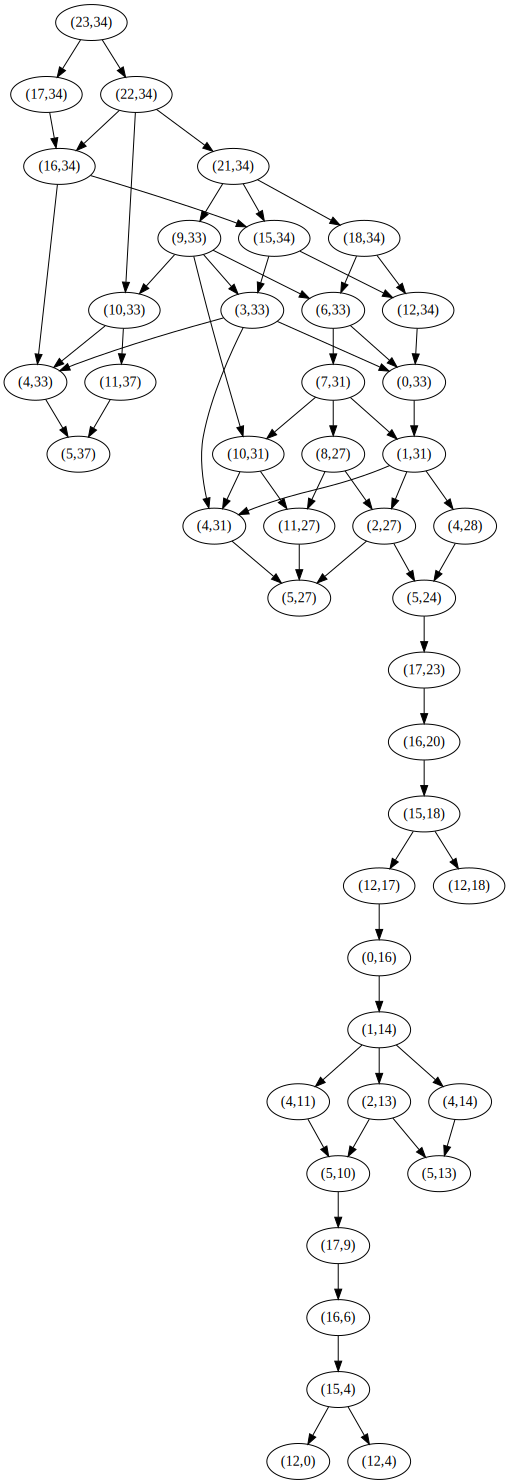

In [12]:
search_graph = SearchGraph(DomainGraph(parameter))
matching_graph = MatchingGraph(search_graph, pattern_graph);
DrawGraph(matching_graph)

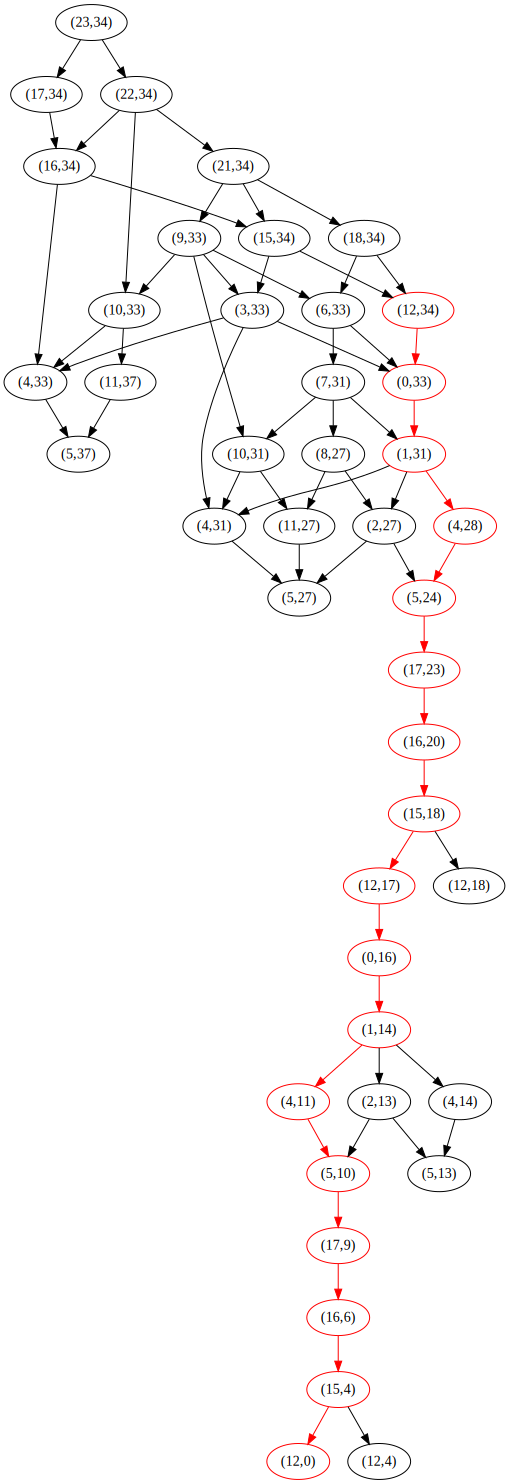

In [13]:
path_match = PathMatch(matching_graph)
DrawGraphWithHighlightedPath(matching_graph, path_match)

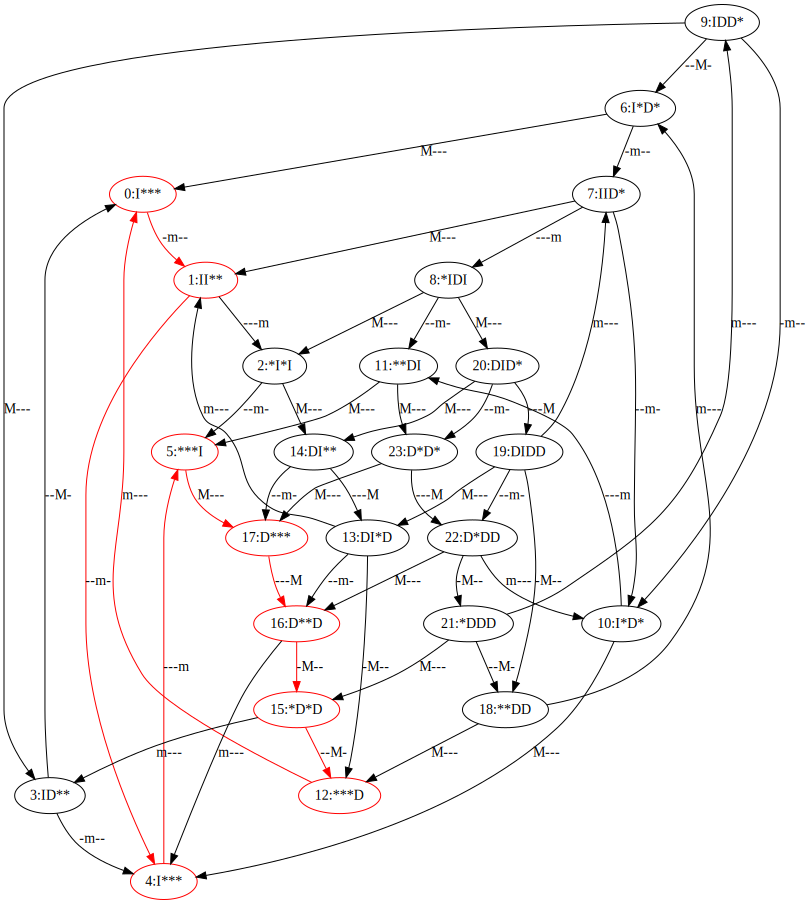

In [14]:
search_graph_path_match = IntList()
search_graph_path_match.extend([ pair.first for pair in path_match ])
DrawGraphWithHighlightedPath(search_graph, search_graph_path_match)

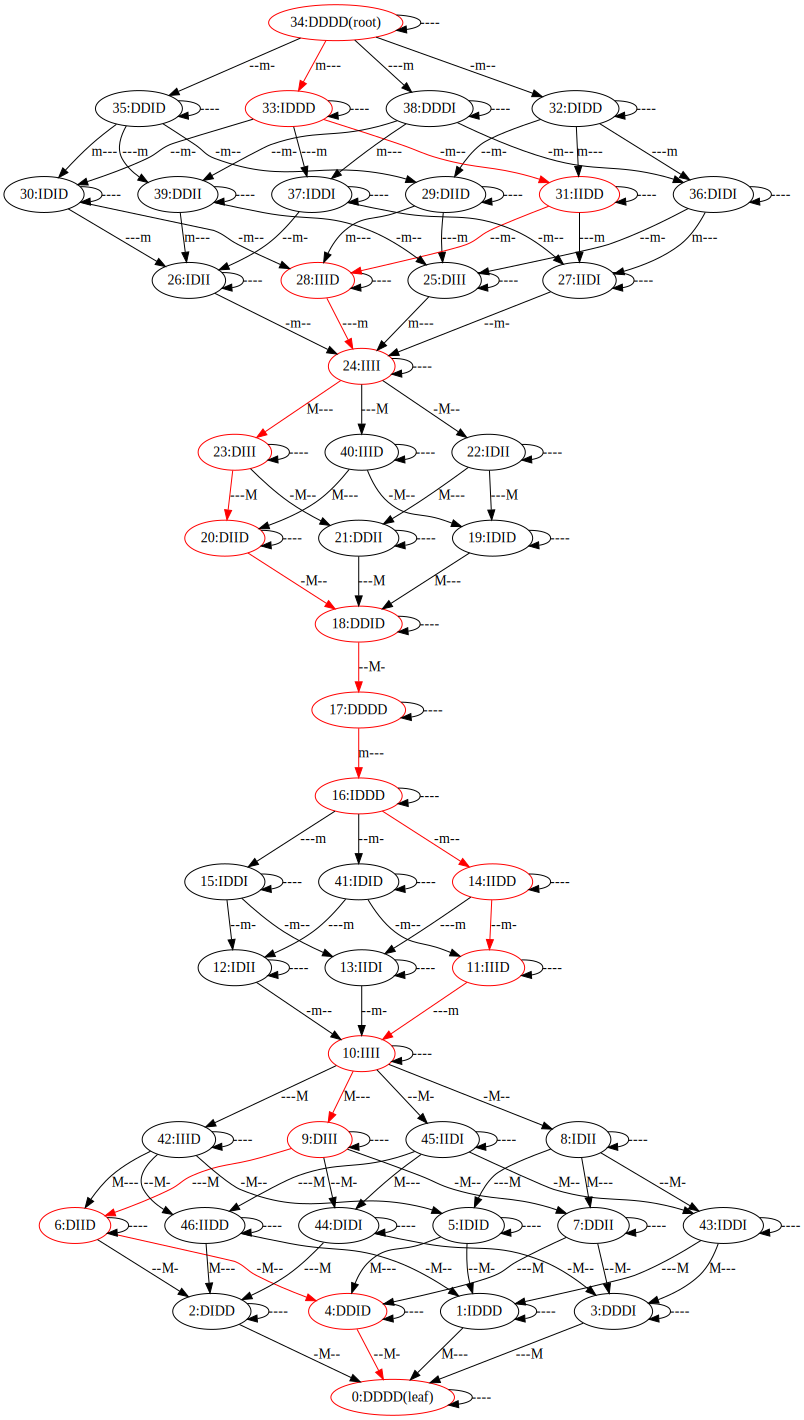

In [15]:
pattern_graph_path_match = IntList()
pattern_graph_path_match.extend([ pair.second for pair in path_match ])
DrawGraphWithHighlightedPath(pattern_graph, pattern_graph_path_match)

In [16]:
search_graph_match_string = search_graph.graphviz_with_highlighted_path(search_graph_path_match)
pattern_graph_match_string = pattern_graph.graphviz_with_highlighted_path(pattern_graph_path_match)
matching_graph_match_string = matching_graph.graphviz_with_highlighted_path(path_match)

In [17]:
with open("MatchFigureSearch.gv", "w") as text_file:
    text_file.write(search_graph_match_string)
with open("MatchFigurePattern.gv", "w") as text_file:
    text_file.write(pattern_graph_match_string)
with open("MatchFigureMatch.gv", "w") as text_file:
    text_file.write(matching_graph_match_string)

In [18]:
import subprocess
subprocess.call("dot -Tpdf MatchFigureSearch.gv -o MatchFigureSearch.pdf ", shell=True)
subprocess.call("dot -Tpdf MatchFigurePattern.gv -o MatchFigurePattern.pdf ", shell=True)
subprocess.call("dot -Tpdf MatchFigureMatch.gv -o MatchFigureMatch.pdf ", shell=True)

0